## Cumulative xGSA Charts at All-Star Break

Top 10 Goalies

- Jacob Markstrom
- Connor Hellebuyck
- Thatcher Demko
- Connor Ingram
- Adin Hill
- Jeremy Swayman
- Tristan Jarry
- Jordan Binnington
- Joey Daccord
- John Gibson

Bottom 10 Goalies on Nov 23rd

- Stuart Skinner
- Vitek Vanecek
- Filip Gustavsson
- Marc-Andre Fleury
- Samuel Ersson
- Dan Vladar	
- Anton Forsberg
- Alexandar Georgiev		
- Ilya Samsonov
- Philipp Grubauer


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob
import re

In [120]:
# Create dict of dataframes from csv
goaliePaths = [file for file in glob.glob('goalie-csv/*.csv',)]

data = {re.split("_", file, 5)[4]: pd.read_csv(file) for file in goaliePaths}

data["skinner"].head()

,Player,Date,Game_ID,Season,Team,Opponent,Is_Home,Position,TOI,TOI%,GA,SA,FA,xGA,Sv%,FSv%,xFSv%,dFSv%,GSAx
0,Stuart Skinner,2023-10-11,2023020009,20232024,EDM,VAN,0,G,32.50,54.17,3.96,17.26,19.40,1.36,77.03,79.57,93.01,-13.44,-2.61
1,Stuart Skinner,2023-10-14,2023020029,20232024,EDM,VAN,1,G,57.63,96.06,4.19,16.48,24.94,2.41,74.58,83.21,90.35,-7.14,-1.78
2,Stuart Skinner,2023-10-21,2023020077,20232024,EDM,WPG,1,G,63.73,99.77,2.98,26.40,35.33,2.70,88.71,91.56,92.36,-0.80,-0.28
3,Stuart Skinner,2023-10-26,2023020110,20232024,EDM,NYR,1,G,60.00,100.00,3.22,35.18,50.02,2.88,90.85,93.56,94.25,-0.69,-0.34
4,Stuart Skinner,2023-10-29,2023020129,20232024,EDM,CGY,1,G,59.75,99.58,2.08,25.38,44.84,3.07,91.80,95.36,93.16,2.20,0.99


In [121]:
# Calculate cummulative GSAx and add Total GSAx by game as seperate column for each goalie
for goalie in data.values():
    goalie.drop(goalie.tail(1).index, inplace=True)
    totalGSAx = 0
    GSAxList = []
    for game in goalie["GSAx"]:
        totalGSAx += game
        GSAxList.append(totalGSAx)
    goalie["Total GSAx"] = GSAxList

TransformedBbox(
    Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=10.0, y1=10.0),
            Affine2D().scale(100.0))))
TransformedBbox(
    Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=10.0, y1=10.0),
            Affine2D().scale(100.0))))
TransformedBbox(
    Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=10.0, y1=10.0),
            Affine2D().scale(100.0))))
TransformedBbox(
    Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=10.0, y1=10.0),
            Affine2D().scale(100.0))))
TransformedBbox(
    Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88),
    BboxTransformTo(
        TransformedBbox(
            Bbox

Text(0.5, 0, 'Game #')

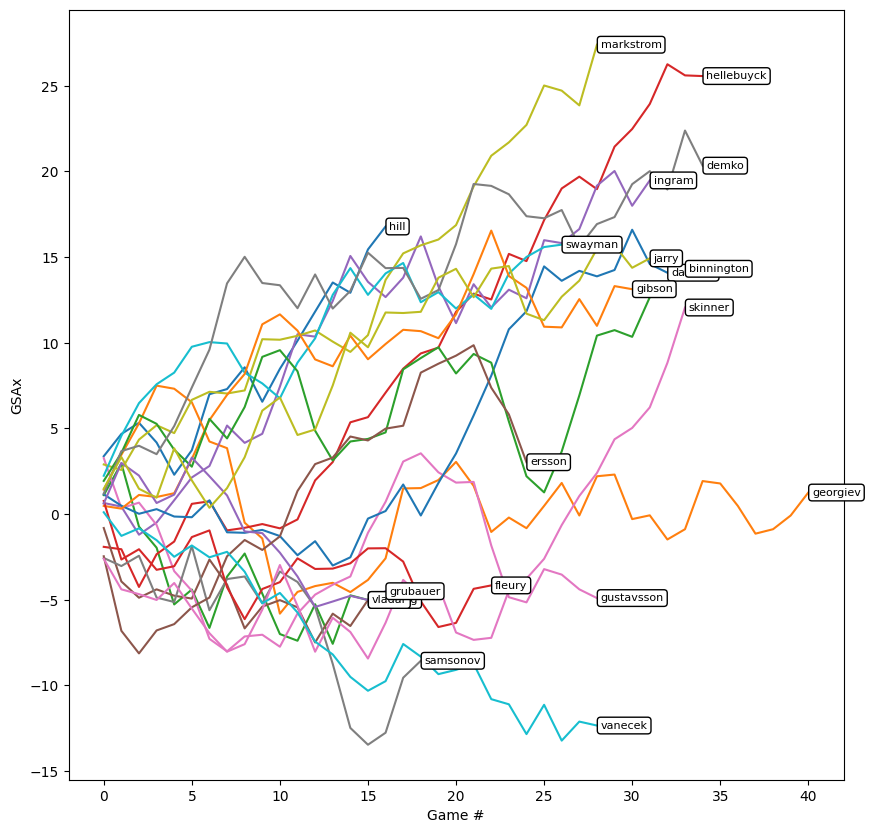

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))

for goalie in data.values():
    plt.plot(goalie["Total GSAx"])

labels = [x for x in data.keys()]

for line, name in zip(ax.lines, labels):
    x = len(data[name])
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(x,y), xytext=(-10,0), 
                xycoords = "data", textcoords="offset points",
                size=8, va="center", bbox=dict(boxstyle='round, pad=0.3', facecolor="white"))
    bbox = ax.get_window_extent()
    print(bbox)

plt.ylabel("GSAx")
plt.xlabel("Game #")